In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2)

In [3]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


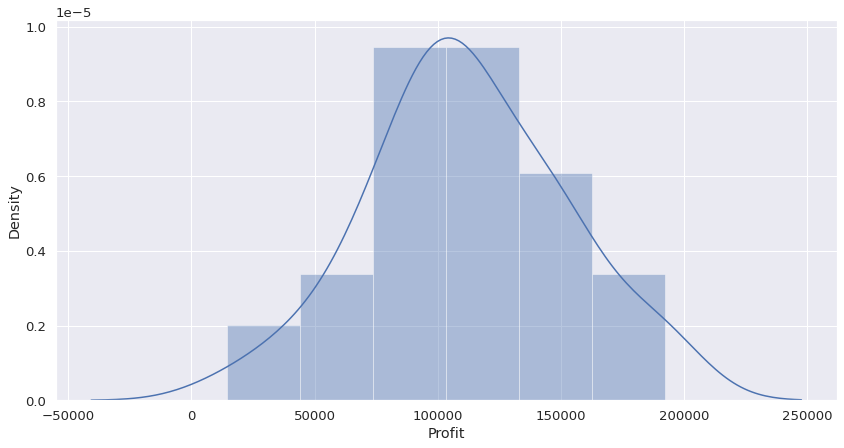

In [7]:
sns.distplot(data['Profit'],bins=6,kde=True)

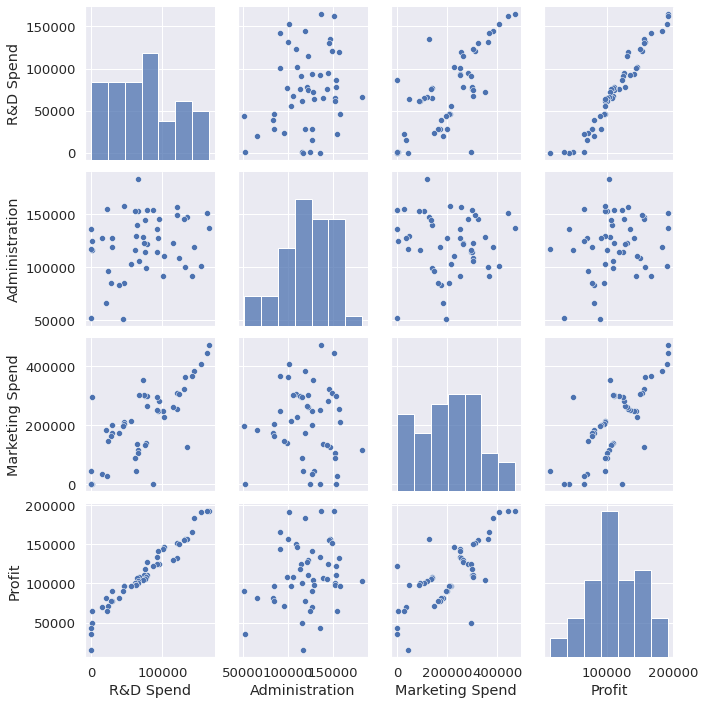

In [8]:
sns.pairplot(data)

In [10]:
pipeline = Pipeline( [ ('Std_Scaler',StandardScaler())])

In [11]:
num_attrs = ['R&D Spend','Administration','Marketing Spend']
cat_attrs = ['State']

In [12]:
fullpipeline = ColumnTransformer([('num',pipeline,num_attrs),
                                   ('cat',OneHotEncoder(),cat_attrs)])

In [13]:
x=data.drop('Profit',axis = 1)
y=data['Profit']

In [14]:
x=fullpipeline.fit_transform(x)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()

In [20]:
m.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_predicted=m.predict(X_test)

In [22]:
m.score(X_train , y_train)

0.9501847627493607

In [23]:
m.score(X_test , y_test)


0.9347068473282425

In [26]:
from sklearn.metrics import mean_squared_error
m.meansqerror = mean_squared_error (y_test , y_predicted)
m.rmeansqerror = np.sqrt(m.meansqerror)
m.rmeansqerror

9137.990152794946